In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Base URL of Goetgevonden API
apiUrl = "https://api.goetgevonden.nl"
goetgevondenBase = "/projects/republic"
goetgevondenBrintaBase = "/brinta/republic"

#About endpoint
about = "/about"

#Swagger endpoint
swagger = "/swagger"

#Search endpoint
searchEndpoint = goetgevondenBase + "/search"

#Views endpoint (unused for Goetgevonden)
views = goetgevondenBase + "/views"

#Endpoint to get all unique annotation types in the Goetgevonden dataset
uniqueAnnoTypesEndpoint = goetgevondenBase

#Endpoint to get all ElasticSearch indices, their keys, and their field types
indicesEndpoint = goetgevondenBrintaBase + "/indices"

response = requests.get(apiUrl + about)
data = response.json()
print(json.dumps(data, indent=2))

{
  "appName": "Broccoli",
  "version": "0.40.2",
  "startedAt": "2024-12-04T09:20:25.540539035Z",
  "baseURI": "https://api.goetgevonden.nl",
  "hucLogLevel": "DEBUG"
}


In [3]:
query = {"terms":{"propositionType":["memorie"],"roleName":["admiraal"]},"date":{"name":"sessionDate","from":"1576-08-04","to":"1796-03-01"},"range":{"name":"text.tokenCount","from":"0","to":"66000"},"aggs":{"textType":{"order":"countDesc","size":10},"resolutionType":{"order":"countDesc","size":10},"propositionType":{"order":"countDesc","size":10},"delegateName":{"order":"keyAsc","size":9999},"personName":{"order":"keyAsc","size":9999},"roleName":{"order":"keyAsc","size":9999},"roleCategories":{"order":"countDesc","size":10},"locationName":{"order":"keyAsc","size":9999},"locationCategories":{"order":"countDesc","size":10},"organisationName":{"order":"keyAsc","size":9999},"organisationCategories":{"order":"countDesc","size":10},"commissionName":{"order":"keyAsc","size":9999},"commissionCategories":{"order":"countDesc","size":10},"sessionWeekday":{"order":"countDesc","size":10},"delegateId":{"order":"countDesc","size":10},"personId":{"order":"countDesc","size":10},"roleId":{"order":"countDesc","size":10},"locationId":{"order":"countDesc","size":10},"organisationId":{"order":"countDesc","size":10},"commissionId":{"order":"countDesc","size":10},"bodyType":{"order":"countDesc","size":10},"sessionDate":{"order":"countDesc","size":10},"sessionDay":{"order":"countDesc","size":10},"sessionMonth":{"order":"countDesc","size":10},"sessionYear":{"order":"countDesc","size":250}}}

response = requests.post(apiUrl + searchEndpoint, json=query)
data = response.json()
print(json.dumps(data, indent=2, ensure_ascii=False))

{
  "total": {
    "value": 53,
    "relation": "eq"
  },
  "results": [
    {
      "_id": "urn:republic:inv-3760-date-1705-09-17-session-245-resolution-15",
      "textType": "printed",
      "resolutionType": "ordinaris",
      "propositionType": "memorie",
      "sessionWeekday": "donderdag",
      "bodyType": "Resolution",
      "sessionDate": "1705-09-17",
      "sessionDay": 17,
      "sessionMonth": 9,
      "sessionYear": 1705
    },
    {
      "_id": "urn:republic:inv-3760-date-1705-11-19-session-307-resolution-8",
      "textType": "printed",
      "resolutionType": "ordinaris",
      "propositionType": "memorie",
      "sessionWeekday": "donderdag",
      "bodyType": "Resolution",
      "sessionDate": "1705-11-19",
      "sessionDay": 19,
      "sessionMonth": 11,
      "sessionYear": 1705
    },
    {
      "_id": "urn:republic:inv-3760-date-1705-11-24-session-312-resolution-11",
      "textType": "printed",
      "resolutionType": "ordinaris",
      "propositionType": "m

# Use case 4

Did the numerical relation between secret and ordinary resolutions change from 1671 to 1720? (to also include the 'Rampjaar' 1672)

Query the api for annotations of secrete and ordinaris resolutions. If the API supports counting (or returns number of hits), query per year and return numerical results for each type of resolution

In [4]:
secretQuery = {
    'terms': {'resolutionType': ['secreet']},
    'date': {
        'name': 'sessionDate',
        'from': '1671-01-01',
        'to': '1720-12-31'
    },
    'aggs': {
        'sessionYear': {
            'order': 'countDesc',
            'size': 250
        }
    }
}

result = requests.post(apiUrl + searchEndpoint, json=secretQuery)
data = result.json()

numberOfSecretResolutionsPerYear = []

for years in data['aggs']['sessionYear']:
    numberOfSecretResolutionsPerYear.append({'year': int(years), 'count': int(data['aggs']['sessionYear'][years])})

numberOfSecretResolutionsPerYear = sorted(numberOfSecretResolutionsPerYear, key=lambda x: x['year'])

print(numberOfSecretResolutionsPerYear)


[{'year': 1671, 'count': 159}, {'year': 1672, 'count': 603}, {'year': 1673, 'count': 525}, {'year': 1674, 'count': 539}, {'year': 1675, 'count': 574}, {'year': 1676, 'count': 667}, {'year': 1677, 'count': 573}, {'year': 1678, 'count': 525}, {'year': 1679, 'count': 194}, {'year': 1680, 'count': 248}, {'year': 1681, 'count': 281}, {'year': 1682, 'count': 403}, {'year': 1683, 'count': 446}, {'year': 1684, 'count': 323}, {'year': 1685, 'count': 240}, {'year': 1686, 'count': 231}, {'year': 1687, 'count': 290}, {'year': 1688, 'count': 461}, {'year': 1689, 'count': 818}, {'year': 1690, 'count': 689}, {'year': 1691, 'count': 623}, {'year': 1692, 'count': 503}, {'year': 1693, 'count': 653}, {'year': 1694, 'count': 446}, {'year': 1695, 'count': 344}, {'year': 1696, 'count': 507}, {'year': 1697, 'count': 445}, {'year': 1698, 'count': 350}, {'year': 1699, 'count': 443}, {'year': 1700, 'count': 670}, {'year': 1701, 'count': 867}, {'year': 1702, 'count': 973}, {'year': 1703, 'count': 1158}, {'year':

In [5]:
ordinaryQuery = {
    'terms': {'resolutionType': ['ordinaris']},
    'date': {
        'name': 'sessionDate',
        'from': '1671-01-01',
        'to': '1720-12-31'
    },
    'aggs': {
        'sessionYear': {
            'order': 'countDesc',
            'size': 250
        }
    }
}

result = requests.post(apiUrl + searchEndpoint, json=ordinaryQuery)
data = result.json()

numberOfOrdinaryResolutionsPerYear = []

for years in data['aggs']['sessionYear']:
    numberOfOrdinaryResolutionsPerYear.append({'year': int(years), 'count': int(data['aggs']['sessionYear'][years])})

numberOfOrdinaryResolutionsPerYear = sorted(numberOfOrdinaryResolutionsPerYear, key=lambda x: x['year'])

print(numberOfOrdinaryResolutionsPerYear)

[{'year': 1671, 'count': 3335}, {'year': 1672, 'count': 3906}, {'year': 1673, 'count': 3373}, {'year': 1674, 'count': 3300}, {'year': 1675, 'count': 3178}, {'year': 1676, 'count': 3313}, {'year': 1677, 'count': 3313}, {'year': 1678, 'count': 3128}, {'year': 1679, 'count': 2775}, {'year': 1680, 'count': 2524}, {'year': 1681, 'count': 2648}, {'year': 1682, 'count': 2860}, {'year': 1683, 'count': 2934}, {'year': 1684, 'count': 2753}, {'year': 1685, 'count': 2859}, {'year': 1686, 'count': 2893}, {'year': 1687, 'count': 2727}, {'year': 1688, 'count': 2976}, {'year': 1689, 'count': 4166}, {'year': 1690, 'count': 4353}, {'year': 1691, 'count': 3986}, {'year': 1692, 'count': 4155}, {'year': 1693, 'count': 4236}, {'year': 1694, 'count': 4487}, {'year': 1695, 'count': 3873}, {'year': 1696, 'count': 3725}, {'year': 1697, 'count': 3441}, {'year': 1698, 'count': 3257}, {'year': 1699, 'count': 3709}, {'year': 1700, 'count': 3373}, {'year': 1701, 'count': 3939}, {'year': 1702, 'count': 6053}, {'year'

In [6]:
df = pd.DataFrame({'secret': numberOfSecretResolutionsPerYear, 'ordinary': numberOfOrdinaryResolutionsPerYear})

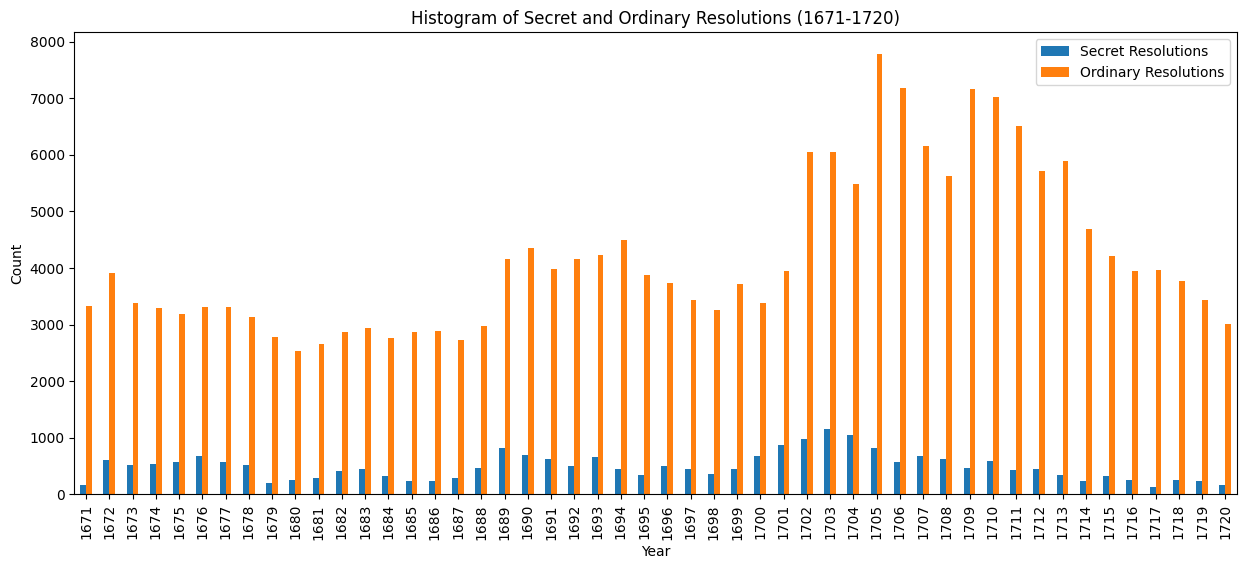

In [7]:
df['secret_count'] = df['secret'].apply(lambda x: x['count'])
df['ordinary_count'] = df['ordinary'].apply(lambda x: x['count'])
df['year'] = df['secret'].apply(lambda x: x['year'])
df.set_index('year', inplace=True)

df[['secret_count', 'ordinary_count']].plot(kind='bar', figsize=(15, 6))
plt.title('Histogram of Secret and Ordinary Resolutions (1671-1720)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Secret Resolutions', 'Ordinary Resolutions'])
plt.show()

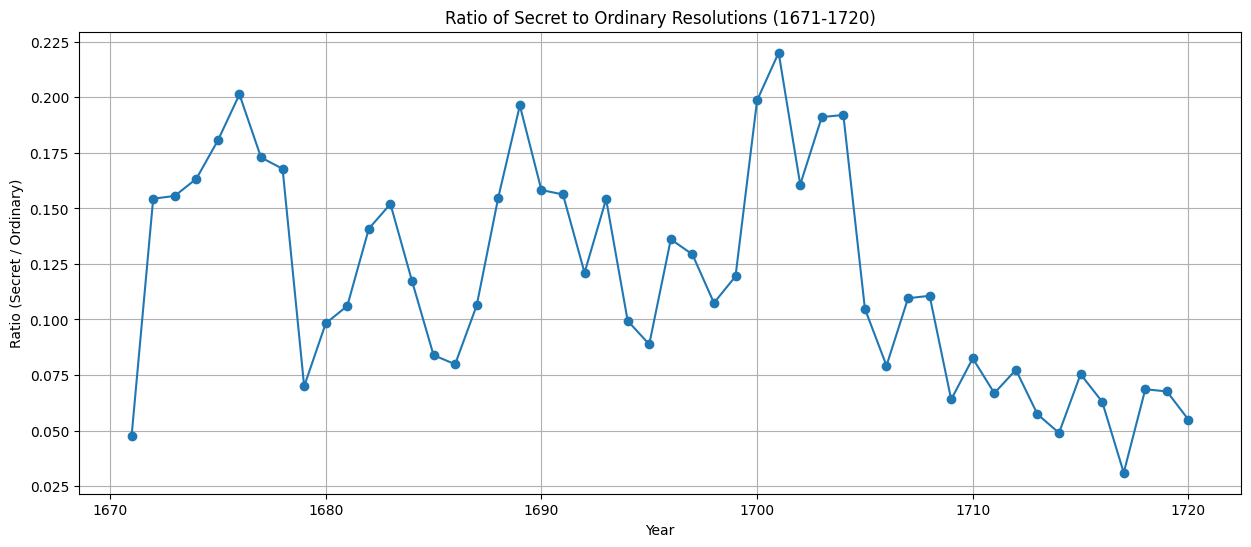

count    50.000000
mean      0.118888
std       0.048799
min       0.031014
25%       0.077822
50%       0.110118
75%       0.156135
max       0.220107
Name: ratio, dtype: float64


In [8]:
df['ratio'] = df['secret_count'] / df['ordinary_count']

df['ratio'].plot(kind='line', figsize=(15, 6), marker='o')
plt.title('Ratio of Secret to Ordinary Resolutions (1671-1720)')
plt.xlabel('Year')
plt.ylabel('Ratio (Secret / Ordinary)')
plt.grid(True)
plt.show()

print(df['ratio'].describe())

# Research use case 6
Which provinces and which delegates attended the sessions of the resolutions most frequently at the time of Frederik Henry. 

Frederik Henry was stadholder from 1625–1647. Query the API for annotations of attendance lists for the sessions of 1625 to 1647 and the delegates in them. Attendance lists annotations contain provincial affiliation and delegate ids, which can be counted.

Ofwel:
- Via Broccoli eerst een lijst van alle resoluties ophalen, daarna de overlappende `Session` annotaties ophalen en dan provincies en gedeputeerden tellen.
- Rechtstreeks bij AnnoRepo de `Session` annotaties voor de date range ophalen en dan provincies en gedeputeerden tellen.

In [13]:
query = {
    'date': {
        'name': 'sessionDate',
        'from': '1625-01-01',
        'to': '1625-12-31' #TODO: resultaten per jaar ophalen, want 1625-1647 is meer dan 10.000 hits
    },
}

params = {
    'from': 0,
    'size': 100,
    'sortBy': 'sessionDate',
    'sortOrder': 'asc'
}

startFrom = 0
size = 100
allResultsFetched = False

def get_results_per_page(nextFrom, nextSize):
    params['from'] = nextFrom
    params['size'] = nextSize

    result = requests.post(apiUrl + searchEndpoint, json=query, params=params)    

    return result.json()

resolutionIds = []

while not allResultsFetched:
    result = get_results_per_page(startFrom, size)
    startFrom += size

    if startFrom < result['total']['value'] + size: #TODO: laatste 64 worden nu niet opgehaald, fixen
        for res in result['results']:
            ids = [res['_id']]
            resolutionIds.append(ids)
        print(f"Fetched up to: {startFrom}")
        print(f"Total results: {result['total']['value']}")

    else:
        print("All results fetched.")
        allResultsFetched = True

Fetched up to: 100
Total results: 1764
Fetched up to: 200
Total results: 1764
Fetched up to: 300
Total results: 1764
Fetched up to: 400
Total results: 1764
Fetched up to: 500
Total results: 1764
Fetched up to: 600
Total results: 1764
Fetched up to: 700
Total results: 1764
Fetched up to: 800
Total results: 1764
Fetched up to: 900
Total results: 1764
Fetched up to: 1000
Total results: 1764
Fetched up to: 1100
Total results: 1764
Fetched up to: 1200
Total results: 1764
Fetched up to: 1300
Total results: 1764
Fetched up to: 1400
Total results: 1764
Fetched up to: 1500
Total results: 1764
Fetched up to: 1600
Total results: 1764
Fetched up to: 1700
Total results: 1764
Fetched up to: 1800
Total results: 1764
All results fetched.


In [14]:
df = pd.DataFrame(resolutionIds)
df

,0
0,urn:republic:inv-3184-date-1625-01-01-session-...
1,urn:republic:inv-3184-date-1625-01-01-session-...
2,urn:republic:inv-3184-date-1625-01-01-session-...
3,urn:republic:inv-3184-date-1625-01-01-session-...
4,urn:republic:inv-3184-date-1625-01-01-session-...
...,...
1759,urn:republic:inv-3184-date-1625-12-29-session-...
1760,urn:republic:inv-3184-date-1625-12-29-session-...
1761,urn:republic:inv-3184-date-1625-12-29-session-...
1762,urn:republic:inv-3184-date-1625-12-29-session-...


In [32]:
from annorepo.client import AnnoRepoClient

client = AnnoRepoClient("https://annorepo.goetgevonden.nl")
container = "republic-2024.11.30"

query = {
    "body.type":"Session",
    "body.metadata.sessionYear":1625
}

searchId = client.create_search(container, query)
print(searchId)

SearchInfo(id='d27cced2-99ef-4114-bd46-24942ab3f60c', location='https://annorepo.goetgevonden.nl/services/republic-2024.11.30/search/d27cced2-99ef-4114-bd46-24942ab3f60c')


In [ ]:
searchInfo = client.read_search_info(container, "d27cced2-99ef-4114-bd46-24942ab3f60c")
print(searchInfo)



{'query': {'body.type': 'Session', 'body.metadata.sessionYear': 1625}, 'hits': -1}


In [ ]:
query = {"text":"paard","terms":{"resolutionType":["secreet"],"delegateName":["Bout, Pieter"]},"date":{"name":"sessionDate","from":"1576-08-04","to":"1796-03-01"},"range":{"name":"text.tokenCount","from":"0","to":"66000"},"aggs":{"textType":{"order":"countDesc","size":10},"resolutionType":{"order":"countDesc","size":10},"propositionType":{"order":"countDesc","size":10},"delegateName":{"order":"keyAsc","size":9999},"personName":{"order":"keyAsc","size":9999},"roleName":{"order":"keyAsc","size":9999},"roleCategories":{"order":"countDesc","size":10},"locationName":{"order":"keyAsc","size":9999},"locationCategories":{"order":"countDesc","size":10},"organisationName":{"order":"keyAsc","size":9999},"organisationCategories":{"order":"countDesc","size":10},"commissionName":{"order":"keyAsc","size":9999},"commissionCategories":{"order":"countDesc","size":10},"sessionWeekday":{"order":"countDesc","size":10},"delegateId":{"order":"countDesc","size":10},"personId":{"order":"countDesc","size":10},"roleId":{"order":"countDesc","size":10},"locationId":{"order":"countDesc","size":10},"organisationId":{"order":"countDesc","size":10},"commissionId":{"order":"countDesc","size":10},"bodyType":{"order":"countDesc","size":10},"sessionDate":{"order":"countDesc","size":10},"sessionDay":{"order":"countDesc","size":10},"sessionMonth":{"order":"countDesc","size":10},"sessionYear":{"order":"countDesc","size":250}}}

params = {
    'indexName': 'republic-2024.11.30',
    'fragmentSize': 100,
    'from': 0,
    'size': 10,
    'sortBy': '_score',
    'sortOrder': 'desc'
}

result = requests.post(apiUrl + searchEndpoint, json=query, params=params)

print(result.json())

{'total': {'value': 0, 'relation': 'eq'}, 'results': [], 'aggs': {}}
